### 오토인코더 개념

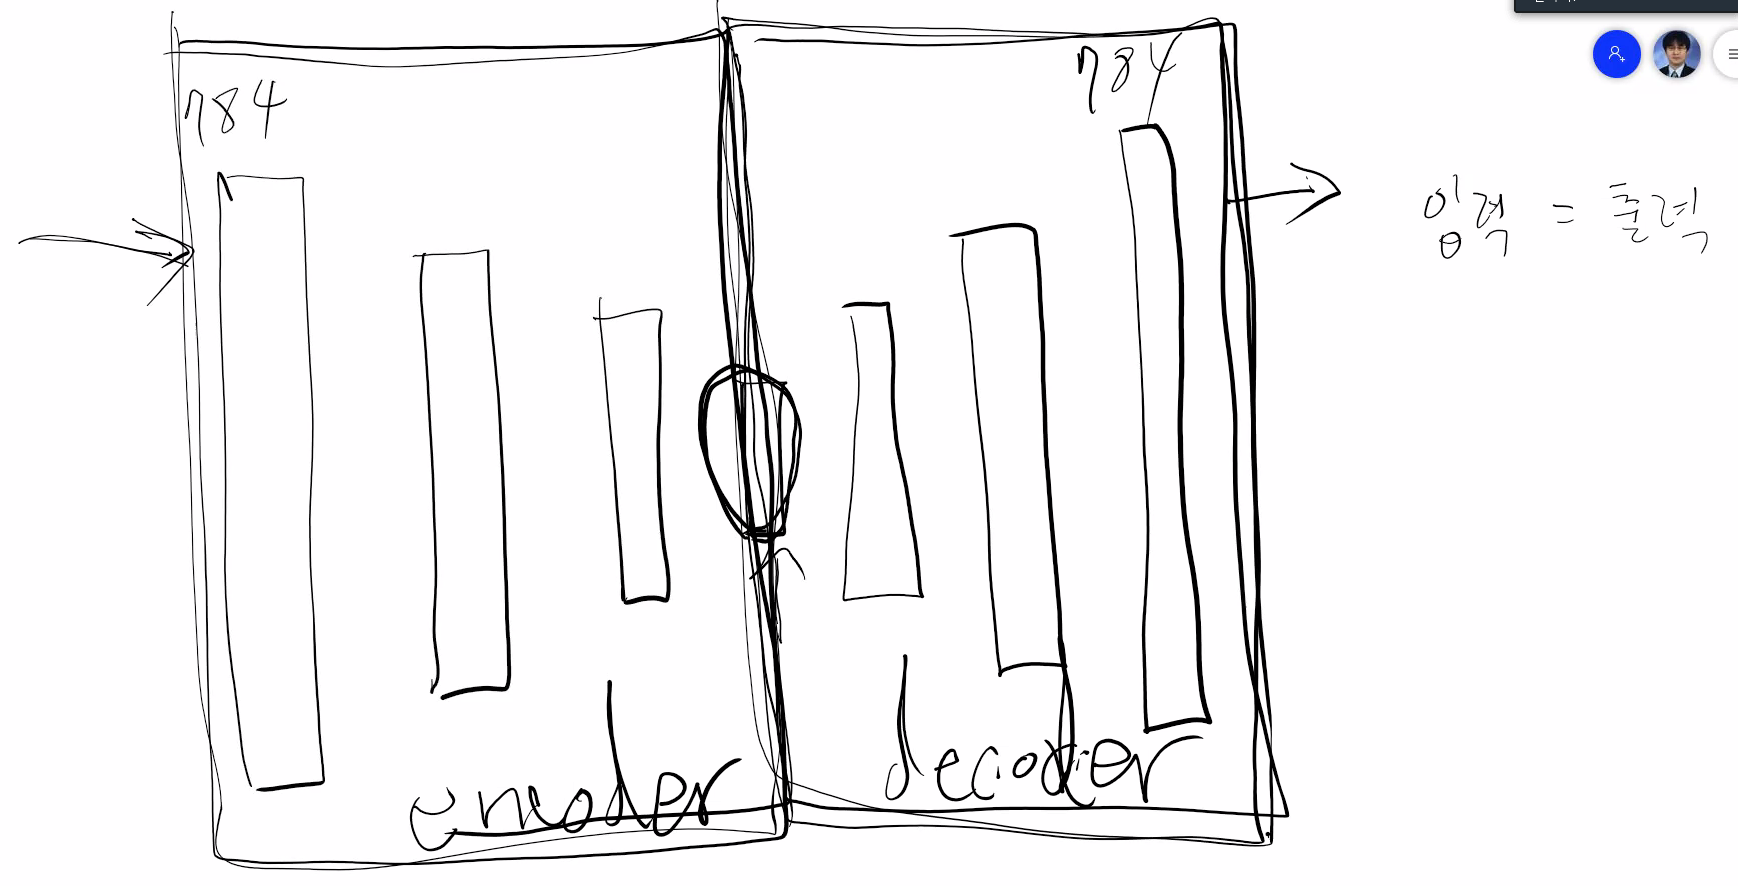

In [22]:
# 모듈 임포트
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

## 오토인코더 생성

In [23]:
# input_img 지정
input_img = Input(shape=(784,))

encoded = Dense(32, activation = 'relu')(input_img) # input 레이어 부여
decoded = Dense(784, activation = 'sigmoid')(encoded) # encoded 레이어를 받아서 Dense 레이어 생성

# encoded는 784 input 받아 32 비트로 출력
# decoded는 32 비트 받아 다시 784로 출력

autoencoder = Model(input_img, decoded) # 오토인코더에는 인코더, 디코더 모두 존재

In [24]:
# summary 확인
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


## 인코더와 디코더 생성으로 오토인코더 원리 알아보기
- 오토인코더 생성 후 인코더 디코더 분리

In [25]:
# 인코더 생성 및 summary 확인
encoder = Model(input_img, encoded)
encoder.summary() # 마지막 레이어가 encoded이기 때문에 마지막 출력 레이어가 32

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [26]:
# 인코딩된 inputdms 32비트
encoded_input = Input(shape=(32,))
# 인코더의 맨 마지막 레이어 가져오기 (784개)
decoded_layer = autoencoder.layers[-1]

# 디코더 생성 및 summary 확인
decoder = Model(encoded_input, decoded_layer(encoded_input)) # 원본 사이즈 784의 픽셀을 출력하는 디코더
decoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


## 오토인코더 학습

In [27]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy') # 두 개의 값만 비교해서 맞다 아니다를 비교할 것이므로 binary_crossentropy 사용

## 데이터 생성

In [28]:
# 오토인코더는 input과 output의 값이 같으므로 input 이미지가 결국 정답 이미지
(x_train, _), (x_test, _) = mnist.load_data() # y값들은 필요하지 않으므로 변수명 _ 지정

# 지도학습
=> 분류 / 예측  
=>> 정답 존재

# 비지도학습
=>    
=>> 정답 비존재 (엄밀히 따지면 출력값이 정답)

## 데이터 전처리

In [29]:
# 픽셀 값 나타내기 위해 데이터타입 변환
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

flatted_x_train = x_train.reshape(-1, 28 * 28) # flatten으로 reshape
flatted_x_test = x_test.reshape(-1, 28 * 28)

print(flatted_x_train.shape)
print(flatted_x_test.shape)

(60000, 784)
(10000, 784)


## 모델 학습 및 시각화

In [30]:
# 모델 학습
fit_hist = autoencoder.fit(flatted_x_train, flatted_x_train, # 입력과 출력이 같아야함
                           epochs = 50, batch_size = 256, shuffle = True,
                           validation_data = (flatted_x_test, flatted_x_test))

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.2794 - val_loss: 0.1951
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1721 - val_loss: 0.1533
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1440 - val_loss: 0.1332
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1278 - val_loss: 0.1202
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1171 - val_loss: 0.1117
Epoch 6/50
219/235 [==========================>...] - ETA: 0s - loss: 0.1103

KeyboardInterrupt: ignored

In [ ]:
# 시각화
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

## 인코딩과 디코딩 나눠서 해보기

In [ ]:
# test 이미지로 인코딩 및 디코딩
encoded_img = encoder.predict(x_test[:10].reshape(-1, 784))
decoded_img = decoder.predict(encoded_img)

In [ ]:
# 10개만 시각화
n = 10
plt.figure(figsize = (20, 4)) # figsize는 이미지 전체 사이즈
plt.gray() # gray색으로 변환

for i in range(n): 
    # 첫 번재 줄은 input 이미지
    ax = plt.subplot(2, n, i+1) # 2=행의 개수, 10=컬럼 개수, i+1=첫번째 자리는 1인데 i가 0부터 시작하므로 +1
    plt.imshow(x_test[i]) # x_test i번째부터 출력
    ax.get_xaxis().set_visible(False) # x축 눈금 미표시
    ax.get_yaxis().set_visible(False) # y축 눈금 미표시

    # 두 번째 줄은 decoded를 거쳐 나온 이미지
    ax = plt.subplot(2, n, i+1+n) # i+1+n은 11번째부터 n=10이므로 i+1+n=11,12,13...
    plt.imshow(decoded_img[i].reshape(28,28)) # decoded_imag 출력
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 
plt.show()

In [ ]:
# 디코더 적용하지 않고 압축해보기
# 10개만 시각화
n = 10
plt.figure(figsize = (20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(encoded_img[i].reshape(4,8))
    plt.gray()
    ax.get_xaxis().set_visible(False) # 첫 번재 줄은 input 이미지
    ax.get_yaxis().set_visible(False)

# 새로운 모델

In [ ]:
# 모델을 키워 해상도 높이기
imput_img = Input(shape=(784,))

encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.summary()

In [ ]:
# 모델 학습
autoencoder.fit(flatted_x_train, flatted_x_train,
                epochs = 100, batch_size = 256,
                validation_data = (flatted_x_test, flatted_x_test))

In [ ]:
decoded_img = autoencoder.predict(flatted_x_test)

In [ ]:
# 10개만 시각화
n = 10
plt.figure(figsize = (20, 4)) # figsize는 이미지 전체 사이즈
plt.gray() # gray색으로 변환

for i in range(n): 
    # 첫 번재 줄은 input 이미지
    ax = plt.subplot(2, n, i+1) # 2=행의 개수, 10=컬럼 개수, i+1=첫번째 자리는 1인데 i가 0부터 시작하므로 +1
    plt.imshow(x_test[i]) # x_test i번째부터 출력
    ax.get_xaxis().set_visible(False) # x축 눈금 미표시
    ax.get_yaxis().set_visible(False) # y축 눈금 미표시

    # 두 번째 줄은 decoded를 거쳐 나온 이미지
    ax = plt.subplot(2, n, i+1+n) # i+1+n은 11번째부터 n=10이므로 i+1+n=11,12,13...
    plt.imshow(decoded_img[i].reshape(28,28)) # decoded_imag 출력
    ax.get_xaxis().set_visible(False) 
    ax.get_yaxis().set_visible(False) 
plt.show()

# CNN 모델 사용

In [32]:
#cnn을 써서 모델향상이 있는지 확인

input_img = Input(shape=(28,28,1)) 
x = Conv2D(16,(3,3),activation='relu',padding='same')(input_img)
x = MaxPool2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = MaxPool2D((2,2),padding='same')(x)
x = MaxPool2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation='relu',padding='same')(x)
encoded = MaxPool2D((2,2),padding='same')(x)

#다시 키워나가야 함
x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x) #maxpool의 반대 개념
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x) #maxpool의 반대 개념
decoded = Conv2D(1, (3,3),activation='sigmoid', padding='same')(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x) #maxpool의 반대 개념
decoded = Conv2D(1, (3,3),activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam',loss ='binary_crossentropy')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 8)           0   

In [33]:
# 데이터 reshape
conv_x_train = np.reshape(x_train, (-1, 28, 28, 1))
conv_x_test = np.reshape(x_test, (-1, 28, 28, 1))

In [34]:
# 모델 학습
autoencoder.fit(conv_x_train, conv_x_train,
                epochs = 50, batch_size = 128,
                validation_data = (conv_x_test, conv_x_test))

Epoch 1/50
469/469 [==============================] - 84s 157ms/step - loss: 0.2125 - val_loss: 0.1487
Epoch 2/50
469/469 [==============================] - 73s 156ms/step - loss: 0.1372 - val_loss: 0.1272
Epoch 3/50
469/469 [==============================] - 74s 157ms/step - loss: 0.1238 - val_loss: 0.1183
Epoch 4/50
192/469 [===========>..................] - ETA: 41s - loss: 0.1185

KeyboardInterrupt: ignored

In [ ]:
decoded_imgs = autoencoder.predict(conv_x_test)
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# 잡음 있는 이미지 처리

In [35]:
# 픽셀 값에 잡음을 섞기
noise_facter = 0.5
x_train_noisy = conv_x_train + noise_facter * np.random.normal( # 정규분포를 따르는 난수 생성
    loc = 0.0, scale = 1.0, size = conv_x_train.shape) # 평균의 위치는 0, 표준편차는 1.0
x_test_noisy = conv_x_test + noise_facter * np.random.normal(
    loc = 0.0, scale = 1.0, size = conv_x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0) # 최소값보다 작은 건 0.0, 1.0보다 큰 건 1.0으로
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

In [ ]:
plt.gray()
n = 10
plt.figure(figsize = (20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
fit_hist = autoencoder.fit(x_train_noisy, conv_x_train,
                           epochs = 100, batch_size = 128,
                           validation_data = (x_test_noisy, conv_x_test))

### 데이터에 잡음이 껴있어도 모델이 학습하는데는 전혀 지장이 없음
원본 데이터 50 epochs 0.0903  
잡음 데이터 100 epochs 0.1141

In [ ]:
# 시각화
plt.plot(fit_history['loss])
plt.plot(fit_his['val_loss'])
plt.show()

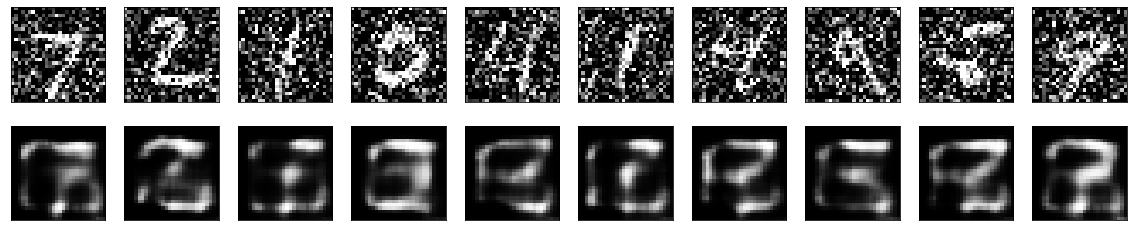

In [36]:
plt.gray()
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()